In [61]:
import numpy as np
import scipy.io

In [3]:
data = scipy.io.loadmat('ex4data1.mat')
weights = scipy.io.loadmat('ex4weights.mat')

In [14]:
theta1 = weights['Theta1']
theta2 = weights['Theta2']

In [16]:
theta2.shape

(10, 26)

In [62]:
X = data['X']
y = data['y']

## 1.2 - Model Representation

In [10]:
#Neural network with i/p layer, hidden layer and one o/p layer

## 1.3 - Feedforward and Cost Function

In [18]:
y.shape

(5000, 1)

In [16]:
#Transform y to 500 * 10 matrix using one hot encoding
y_encoded = np.zeros((y.shape[0], np.unique(y).size))

In [17]:
for i in range(y.shape[0]):
    j = y[i, 0] - 1
    #if (j == 10):
        #j = 9
    y_encoded[i,j] = 1

In [140]:
nn = NeuralNetwork(theta1, theta2)

Initialized Neural Network...


In [141]:
nn.fit(X, y_encoded, alpha=0.2, lam=1)

0.38109495927495074


array([[1.12661530e-04, 1.74127856e-03, 2.52696959e-03, ...,
        4.01468105e-04, 6.48072305e-03, 9.95734012e-01],
       [4.79026796e-04, 2.41495958e-03, 3.44755685e-03, ...,
        2.39107046e-03, 1.97025086e-03, 9.95696931e-01],
       [8.85702310e-05, 3.24266731e-03, 2.55419797e-02, ...,
        6.22892325e-02, 5.49803551e-03, 9.28008397e-01],
       ...,
       [5.17641791e-02, 3.81715020e-03, 2.96297510e-02, ...,
        2.15667361e-03, 6.49826950e-01, 2.42384687e-05],
       [8.30631310e-04, 6.22003774e-04, 3.14518512e-04, ...,
        1.19366192e-02, 9.71410499e-01, 2.06173648e-04],
       [4.81465717e-05, 4.58821829e-04, 2.15146201e-05, ...,
        5.73434571e-03, 6.96288990e-01, 8.18576980e-02]])

In [86]:
nn.

0

In [118]:
class NeuralNetwork():
    def __init__(self,):
        print("Initialized Neural Network...")
    
    def __loss(self, y):
        reg = (self.lam / (2 * y.shape[0])) * (((self.theta1[:, 1:-1]) ** 2).sum() + ((self.theta2[:, 1:-1]) ** 2).sum())
        return (- y * np.log(self.A3) - (1 - y) * np.log(1 - self.A3)).sum() / (y.shape[0]) + reg
    def __sigmoid(self, z):
         return 1 / (1 + np.exp(-z))
    
    def __add_bias(self, X):
        ones = np.ones((X.shape[0], 1))
        return np.c_[ones, X]
        
    def fit(self, X, y, alpha=0.0001, epochs=40):
        self.theta1 = np.random.uniform(low=-0.12, high=0.12, size=(25, 401))
        self.theta2 = np.random.uniform(low=-0.12, high=0.12, size=(10, 26))
        self.losses = []
        self.epochs = epochs
        for epoch in range (epochs):
            #print(f"Epoch {epoch}:")
            #1-forward propagation
            self.A1 = self.__add_bias(X)
            z2 = self.theta1.dot(A1.T)
            self.A2 = sigmoid(z2).T

            self.A2 = self.__add_bias(self.A2)
            z3 = self.theta2.dot(self.A2.T)
            self.A3 = sigmoid(z3).T

            #2 - Add delta
            delta3 = self.A3 - y
            delta2 = delta3.dot(self.theta2) * (self.A2 * (1 - self.A2))

            #3 - Accumalate delta's
            Delta2 = delta3.T.dot(self.A2)
            Delta1 = delta2[:, 1:].T.dot(self.A1)

            #4 - Calculate gradients
            gradient1 = Delta1.sum() / X.shape[0]
            gradient2 = Delta2.sum() / X.shape[0]

            #5 - update gradients
            self.theta1 = self.theta1 - alpha * gradient1
            self.theta2 = self.theta2 - alpha * gradient2
    
            #6 - print loss
            #print(loss(y_encoded))
            self.losses.append(loss(y))
    
    def score(self, X):
        #self.theta1 = np.zeros((layer_1, X.shape[1]))
        #self.alpha = alpha
        #self.lam = lam
        #Compute first layer
        self.A1 = self.__add_bias(X)
        z2 = self.theta1.dot(self.A1.T)
        self.A2 = self.__sigmoid(z2).T
        
        #Compute last layer
        self.A2 = self.__add_bias(self.A2)
        z3 = self.theta2.dot(self.A2.T)
        self.A3 = self.__sigmoid(z3).T
        #print(self.__loss(y))
        return self.A3
    
    #Dummy function
    def predict(self, int):
        value = self.A3[int].argmax() + 1
        if(value == 10):
            return 0
        else: return value
        
        
        

## 2 - Back Propagation

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [144]:
def sigmoid_gradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [150]:
theta1 = np.random.uniform(low=-0.12, high=0.12, size=(25, 401))
theta2 = np.random.uniform(low=-0.12, high=0.12, size=(10, 26))

In [180]:
def add_bias(X):
        ones = np.ones((1, 1))
        return np.c_[ones, X.T]

In [51]:
def loss(y):
    #reg = (self.lam / (2 * y.shape[0])) * (((self.theta1[:, 1:-1]) ** 2).sum() + ((self.theta2[:, 1:-1]) ** 2).sum())
    return (- y * np.log(A3) - (1 - y) * np.log(1 - A3)).sum() / (y.shape[0])

In [249]:
Delta1 = np.zeros((25, 401))
Delta2 = np.zeros((10, 26))
for epochs in range(20):
    
    for i in range(X.shape[0]):
    
        #1 - forward propagation:
        A1 = add_bias(X[i].reshape(X.shape[1], 1)).T
        z2 = theta1.dot(A1)
        A2 = sigmoid(z2)

        A2 = add_bias(A2).T
        z3 = theta2.dot(A2)
        A3 = sigmoid(z3)

        #2 - calculate delta:
        delta3 = A3 - y[i]
        delta2 = theta2.T.dot(delta3) * (A2 * (1 - A2))
        Delta1 += delta2[1:].dot(A1.T)
        Delta2 += delta3.dot(A2.T)
    
    gradient1 = (1 / X.shape[0]) * Delta1
    gradient2 = (1 / X.shape[0]) * Delta2
    theta1 = theta1 - 0.01 * gradient1
    theta2 = theta2 - 0.01 * gradient2

In [5]:
theta1 = np.random.uniform(low=-0.12, high=0.12, size=(25, 401))
theta2 = np.random.uniform(low=-0.12, high=0.12, size=(10, 26))

In [11]:
def add_bias(X):
    ones = np.ones((X.shape[0], 1))
    return np.c_[ones, X]

In [131]:
theta1 = np.random.uniform(low=-0.12, high=0.12, size=(25, 401))
theta2 = np.random.uniform(low=-0.12, high=0.12, size=(10, 26))
losses = []
for epoch in range (300):
    #print(f"Epoch {epoch}:")
    #1-forward propagation
    A1 = add_bias(X)
    z2 = theta1.dot(A1.T)
    A2 = sigmoid(z2).T

    A2 = add_bias(A2)
    z3 = theta2.dot(A2.T)
    A3 = sigmoid(z3).T

    #2 - Add delta
    delta3 = A3 - y_encoded
    delta2 = delta3.dot(theta2) * (A2 * (1 - A2))

    #3 - Accumalate delta's
    Delta2 = delta3.T.dot(A2)
    Delta1 = delta2[:, 1:].T.dot(A1)

    #4 - Calculate gradients
    gradient1 = Delta1.sum() / X.shape[0]
    gradient2 = Delta2.sum() / X.shape[0]

    #5 - update gradients
    theta1 = theta1 - 0.00001 * gradient1
    theta2 = theta2 - 0.00001 * gradient2
    
    #6 - print loss
    #print(loss(y_encoded))
    losses.append(loss(y_encoded))

In [97]:
import matplotlib.pyplot as plt

In [102]:
range(nn.epochs), len(nn.losses)

(range(0, 40), 1)

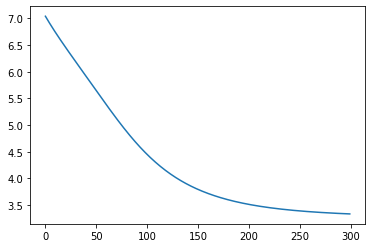

In [132]:
fig, ax = plt.subplots()
ax.plot(range(300), losses)

In [120]:
nn = NeuralNetwork(theta1, theta2)

Initialized Neural Network...


In [113]:
nn.fit(X, y_encoded)

In [121]:
nn.score(X)

array([[0.15323415, 0.07063307, 0.08533876, ..., 0.15547192, 0.08108383,
        0.08301568],
       [0.14952843, 0.06794247, 0.08246621, ..., 0.15004256, 0.07811404,
        0.08010363],
       [0.14800695, 0.06676027, 0.08214781, ..., 0.14955823, 0.07605191,
        0.07967416],
       ...,
       [0.18696497, 0.09858578, 0.11810062, ..., 0.18789635, 0.10761864,
        0.11710498],
       [0.15075123, 0.06813524, 0.08342875, ..., 0.15230611, 0.07718688,
        0.08164173],
       [0.14977024, 0.06720173, 0.08404501, ..., 0.1503362 , 0.0777715 ,
        0.08115549]])

In [122]:
nn.A3[23]

array([0.18325394, 0.09625485, 0.11356308, 0.09638106, 0.09430549,
       0.06856836, 0.11697239, 0.18606081, 0.10677677, 0.11141463])

In [123]:
y[23]

array([10], dtype=uint8)